In [25]:
from pydataset import data
import numpy as np
from scipy import stats 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('data/german_credit_data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


# Estadísitca 2 26/07

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
    * Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
    * Percentiles 25, 75
    * Rango Intercualtílico
    * Boxplot de algunas variables
    * Tabla de frecuencias
    * Variables cualitativas
    * Variables cuantitativas
    * Frecuencia acumulada
    * Representación de al menos una tabla de frecuencias

2. Interpretación de los resultados.
   * Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Lo primero que hacemos es ver la media, la mediana, el máximo y el mínimo de los valores "Age", "Credit amount" y "Duration".

In [27]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [28]:
print(f'Los valores estadísticos de Age son {df.describe().iloc[:,0]}')
print(f'Los valores estadísticos de Credit amount son {df.describe().iloc[:,2]}')
print(f'Los valores estadísticos de Duration son {df.describe().iloc[:,3]}')

Los valores estadísticos de Age son count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64
Los valores estadísticos de Credit amount son count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64
Los valores estadísticos de Duration son count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64


Con respecto a la edad, hemos constatado que la edad media para pedir un crédito es de 35.5 años, que no difieere mucho de la mediana que es de 33 años. Por lo tanto, encontramos robustez en los datos , dado que son muy cercanos. El valor máximo es de 75 años y el valor mínimo de 19 años.

En cuanto a la media de cantidad de crédito es de 3271 y esta vez difiere más de la mediana, ya que es de 2319, por lo que hay una diferencia mayor con respecto a la diferencia entre la media y la mediana de la edad. Esta diferencia puede ser porque realmente el valor de la cantidad de crédito es mucho más variable que la edad, es decir, podemos encontrar muchos tipos de cantidad para un crédito, en cambio hay menos rango de edad para solicitar un crédito. El valor máximo es de 18424 y el valor mínimo es de 250.
Con relación a la duración (en meses), encontramos que la media  es de 20.9 muy parecida a la mediana que es de 18 meses, por consiguiente hay robustez en los datos. El valor máximo es de 72 meses (6 años) y el valor mínimo es de cuatro meses.

Ahora procedemos a calcular la moda para identificar los valores que más se repiten.

In [29]:
moda = df[['Age','Credit amount', 'Duration']].mode()
display(moda)

,Age,Credit amount,Duration
0,27.0,1258,24.0
1,NaN,1262,NaN
2,NaN,1275,NaN
3,NaN,1393,NaN
4,NaN,1478,NaN


Podemos decir que solamente encontramos un valor que se repite tanto en edad como en duración.  Esto tiene sentido, ya que son valores aislados. En cambio con la cantidad de crédito, observamos que hay una gran variedad de valores que se repiten. Esto es debido a los valores pueden muy diferentes.

Ahora vamos a calcular los percentiles para conocer la distribución de los datos.

In [30]:
q1,q3 = np.percentile(df['Age'],[25,75])
print('El primer cuartil es ',q1)
print('El tercer cuartil es ',q3)
print('El rango intercuarílico es ',q3-q1)

El primer cuartil es  27.0
El tercer cuartil es  42.0
El rango intercuarílico es  15.0


In [31]:
q1,q3 = np.percentile(df['Credit amount'],[25,75])
print('El primer cuartil es ',q1)
print('El tercer cuartil es ',q3)
print('El rango intercuarílico es ',q3-q1)

El primer cuartil es  1365.5
El tercer cuartil es  3972.25
El rango intercuarílico es  2606.75


In [32]:
q1,q3 = np.percentile(df['Duration'],[25,75])
print('El primer cuartil es ',q1)
print('El tercer cuartil es ',q3)
print('El rango intercuarílico es ',q3-q1)

El primer cuartil es  12.0
El tercer cuartil es  24.0
El rango intercuarílico es  12.0


El primer cuartil significa que 25% está por debajo de ese valor. El  tercer cuartil significa que 75% está por debajo de ese valor. El rango intercuartílico es el rango donde se encuentra el 50% de valores del conjunto de datos.
Por lo tanto, en el caso de la edad encontramos que el 25% tienen menos de 27 años, el 75% tienen menos de 42 años y en cuanto al rango intercuartílico quiere decir que el 50% de los datos está en un rango de 15 puntos.

En el caso de la cantidad de crédito, el 25% de la gente solicita una cantidad de 1365, el 75% de 3972 y el 50% de los datos está en un rango de 2606 puntos.

En el tercer caso, el 25 % de la duración para pagar ese crédito es de 12 meses, el 75% es de 24 meses y el 50% de los datos está en un rango de 12 puntos.

A continuación vamos a crear tres gráficos correspondientes a las columnas que estamos analizando para mostrar los datos analizados.

Text(0.5, 1.0, 'Duración')

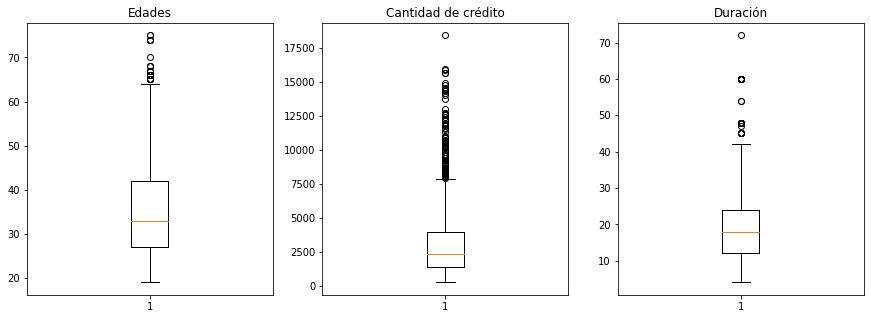

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].boxplot(df['Age'])
ax[0].set_title('Edades')

ax[1].boxplot(df['Credit amount'])
ax[1].set_title('Cantidad de crédito')


ax[2].boxplot(df['Duration'])
ax[2].set_title('Duración')

En todos los gráficos observamos que los valores atípicos están por encima del valor máximo del rango intercuartílico.

Ahora vamos a calcular las frecuencias absolutas, una para variable actegórica y otra para variable numérica.

In [34]:
df_frecuencias = df.groupby('Age').count().reset_index().sort_values(by = 'Age')
df_frecuencias.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,19,2,2,2,2,1,2,2,2
1,20,14,14,14,11,10,14,14,14
2,21,14,14,14,12,8,14,14,14
3,22,27,27,27,27,22,27,27,27
4,23,48,48,48,41,37,48,48,48


In [35]:
df_frecuencias2 = df.groupby('Sex').count().reset_index()
df_frecuencias2.head()

,Sex,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,female,310,310,310,261,194,310,310,310
1,male,690,690,690,556,412,690,690,690


Lo que observamos con la frecuencia absoluta es que en el caso de la edad como hay bastantes opciones de edad, la frecuencia es menor en comparación con la frecuencia absoluta de la categórica, ya que solo cuenta con dos opciones como respuesta. Los datos difieren que los hombres solicitan más crédito que las mujeres.

Ahora vamos a realizar varias tablas de frecuencia relativa tanto para variable numérica como categórica.

In [36]:
df_sin = df_frecuencias.drop('Age',axis=1)
relativa = (df_sin/df.shape[0])*100
columnas = df_sin.columns
df_frecuencias[columnas] = relativa
df_frecuencias.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,19,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2
1,20,1.4,1.4,1.4,1.1,1.0,1.4,1.4,1.4
2,21,1.4,1.4,1.4,1.2,0.8,1.4,1.4,1.4
3,22,2.7,2.7,2.7,2.7,2.2,2.7,2.7,2.7
4,23,4.8,4.8,4.8,4.1,3.7,4.8,4.8,4.8


In [37]:
# Frecuencia relativa
df_sin = df_frecuencias2.drop('Sex',axis=1)
relativa = (df_sin/df.shape[0])*100
columnas = df_sin.columns
df_frecuencias2[columnas] = relativa
df_frecuencias2.head()

,Sex,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,female,31.0,31.0,31.0,26.1,19.4,31.0,31.0,31.0
1,male,69.0,69.0,69.0,55.6,41.2,69.0,69.0,69.0


Aquí los resultados son similares a los resultados de la frecuencia absoluta, en el sentido que al haber mayor número de opciones en la edad que en la variable categórica de género, los resultados de edad van a ser menores.
Contatamos según los datos que al 69% de los hombres se les concede creditos, mientras que se concede el 31% a las mujeres.

Ahora procedemos a calcular la frecuencia acumulada.

In [38]:
#Frecuencias acumulada
frecuencia_edad = pd.DataFrame(df.groupby('Age')['Sex'].count())
frecuencia_edad['frecuencia_acumulada'] = frecuencia_edad['Sex'].cumsum()
frecuencia_edad.drop('Sex',axis=1,inplace=True)
frecuencia_edad.head()



,frecuencia_acumulada
Age,
19,2
20,16
21,30
22,57
23,105


Tras calcular la frecuencia acumulada, nos damos cuenta de que a mayor edad, hay mayor frecuencia, puesto que contiene la frecuencia de su edad más la suma de las edades inferiores.

A continuación, vamos a crear un lineplot con los valores de la variable edad de la tabla frecuencia acumulada.

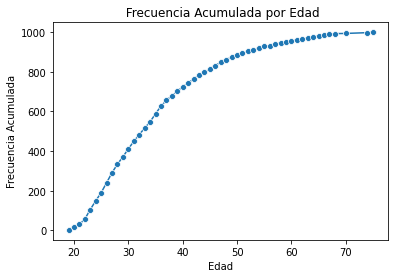

In [39]:
sns.lineplot(x='Age', y='frecuencia_acumulada', data=frecuencia_edad, marker='o')
plt.xlabel('Edad')
plt.ylabel('Frecuencia Acumulada')
plt.title(' Frecuencia Acumulada por Edad');

Gracias a este gráfico observamos que cuanta mayor es la edad, mayor frecuencia encontramos.